# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [441]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [442]:
income.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')

In [443]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

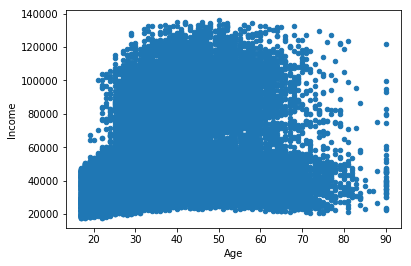

In [444]:
income.plot(x='Age', y='Income', kind='scatter')

In [445]:
# import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [446]:
# Initialize
clf = LinearRegression()

In [447]:
#Dimensión del dataframe
income2.shape

(32561, 2)

In [448]:
income2=income[['Age','Income']]
a=np.array(income2,dtype=int)

In [449]:
x=a[:,0]
y=a[:,1]

In [450]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

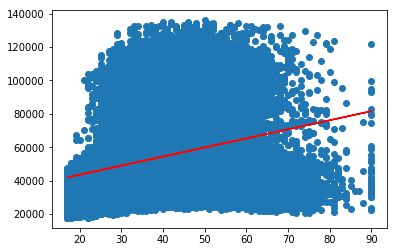

In [451]:
plt.scatter(x.ravel(), y)
plt.plot(X_test.ravel(), y_new,c='r')

In [452]:
clf.fit(X_train[:, None], y_train)
y_new = clf.predict(X_test[:, None])

print(clf.coef_)
print(clf.intercept_)

[543.88698099]
32654.446384156312


$$y=32654.446384156312\beta_0 +543.88698099 \beta_1$$

La dirección de la Edad y el Ingreso es directamente proporcional. Es decir, un aumento en edad en nuestro modelo representa un aumento en ingreso.
Asumiento que la unidad de ingreso son dólares, un uno por ciento de aumento en la edad representa un aumento de USD 5.43 dólares conforme al cálculo que se muestra a continuación.

In [453]:
(32654.446384156312+543.88698099*0.01)-32654.446384156312

5.438869809899188

El ingreso de una persona de 30 años es de USD 48.971 de acuerdo a este modelo.

In [454]:
32654.446384156312+543.88698099*30

48971.055813856314

El ingreso de una persona de 40 años es de USD 54.409 de acuerdo a este modelo.

In [455]:
32654.446384156312+543.88698099*40

54409.92562375631

# Exercise 2.2
Evaluate the model using the MSE

In [456]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_new))
print('MSE:', metrics.mean_squared_error(y_test, y_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))

MAE: 18877.15360437185
MSE: 584771569.6943127
RMSE: 24182.05056843428


Si tenemos en consideración que el RMSE se muestra en las unidades de la variable de respuesta que en este caso asumimos son dólares, USD 24.182,05 podría ser considerado como un error bastante grande, razón por la que este modelo no pareciera ser lo suficientemente bueno. 


# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [458]:
income3 = pd.DataFrame(income2, columns=['Age', 'Age^2','Income'])
income3['Age^2']=income3['Age']*income3['Age']

In [459]:
x=income3[['Age', 'Age^2']]
y=income3['Income']

In [460]:
x=np.array(x,dtype=int)
y=np.array(y,dtype=int)

### Using OLS

In [461]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [462]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [463]:
# Fit
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [464]:
linreg.coef_

array([2353.59726556,  -22.02285828])

In [465]:
X_test= pd.DataFrame(X_test)
X_test.columns = ['Age', 'Age^2']

In [466]:
y_pred = linreg.predict(X_test[['Age', 'Age^2']])

In [467]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 18446.990943705503
MSE: 542868294.851489
RMSE: 23299.53421962527


### Using Gradient Descent

In [554]:
# import
from sklearn.linear_model import SGDRegressor

Text(0,0.5,'Income')

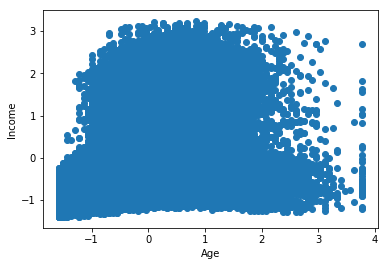

In [555]:
x1 = income3['Age'].values
y1=income3['Income']

#Normalizando la data
y_mean, y_std = y1.mean(), y1.std()
X_mean, X_std = x1.mean(), x1.std()

#Estas son las x y la 'y' normalizada que es la base del modelo.
y = (y1 - y_mean)/ y_std
X = (x1 - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Income')


In [556]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

In [557]:
X=income3[['Age', 'Age^2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]], dtype=int64)

In [558]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))#ss.fit=Compute the mean and standard deviation to be used for later scaling. astype= copy of the array to a pecified type
X = ss.transform(X.astype(np.float))#ss.transform=Perfom standardization by centering and scaling
ss.mean_, ss.scale_
X[0:5]

array([[ 0.03067056, -0.13027593],
       [ 0.83710898,  0.70006807],
       [-0.04264203, -0.19558388],
       [ 1.05704673,  0.96214804],
       [-0.77576787, -0.75536635]])

In [559]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

In [560]:
# Initialize
linreg2 = SGDRegressor(max_iter=10000)

In [561]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [564]:
# Fit
linreg2.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [565]:
linreg2.coef_

array([ 1.67612432, -1.412231  ])

In [524]:
X_test

array([[ 1.71685999,  1.83998874],
       [-1.5088937 , -1.14551777],
       [-0.99570562, -0.89022304],
       ...,
       [-0.77576787, -0.75536635],
       [ 0.47054606,  0.29719432],
       [-1.43558112, -1.11413603]])

In [566]:
y_pred2= linreg2.predict(X_test) * y_std + y_mean
y_pred2

array([60733.03564386, 30415.3192057 , 43138.71050691, ...,
       47676.52088332, 63019.96810491, 32415.96085641])

In [500]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 53584.52427476087
MSE: 2973648922.3348045
RMSE: 54531.17385803101


# Exercise 2.4

Estimate a regression using more features.

How is the performance compared to using only the Age?

In [585]:
x=income[['Age','fnlwgt','Education-Num','Hours per week']]
y=income['Income']

In [586]:
x=np.array(x,dtype=int)
y=np.array(y,dtype=int)

### Using OLS

In [587]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [588]:
X_test= pd.DataFrame(X_test)
X_test.columns = ['Age','fnlwgt','Education-Num','Hours per week']

In [589]:
# Initialize
linreg3 = LinearRegression(fit_intercept=False)

In [590]:
# Fit
linreg3.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [591]:
linreg3.coef_

array([ 3.70306186e+02, -9.75193080e-03,  2.99794876e+03,  2.71126493e+02])

In [592]:
y_pred3= linreg3.predict(X_test[['Age','fnlwgt','Education-Num','Hours per week']])

In [593]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 16917.96283026982
MSE: 463421704.8707638
RMSE: 21527.231704767888


Si comparamos el resultado obtenido con este mismo tipo de regresión utilizando sólo la Edad que fueron los siguientes

MAE: 18446.990943705503
MSE: 542868294.851489
RMSE: 23299.53421962527

el resultado mejoró un poco. Sin embargo, claramente el mejor acercamiento sería hacer un Cross-Validation para poder calcular la variación de los resultados y con esto poder determinar cuál es el mejor modelo.

### Using Gradient Descent

In [594]:
# Initialize
linreg4 = SGDRegressor(max_iter=10000)

In [595]:
x1 = income[['Age','fnlwgt','Education-Num','Hours per week']].values
y1=y

#Normalizando la data
y_mean, y_std = y1.mean(), y1.std()
X_mean, X_std = x1.mean(), x1.std()

#Estas son las x y la 'y' normalizada que es la base del modelo.
y = (y1 - y_mean)/ y_std
X = (x1 - X_mean)/ X_std

In [596]:
X=income[['Age','fnlwgt','Education-Num','Hours per week']].values
X[0:5]

array([[    39,  77516,     13,     40],
       [    50,  83311,     13,     13],
       [    38, 215646,      9,     40],
       [    53, 234721,      7,     40],
       [    28, 338409,     13,     40]], dtype=int64)

In [597]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))#ss.fit=Compute the mean and standard deviation to be used for later scaling. astype= copy of the array to a pecified type
X = ss.transform(X.astype(np.float))#ss.transform=Perfom standardization by centering and scaling
ss.mean_, ss.scale_
X[0:5]

array([[ 0.03067056, -1.06361075,  1.13473876, -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.03542945],
       [ 1.05704673,  0.42580136, -1.19745882, -0.03542945],
       [-0.77576787,  1.40817572,  1.13473876, -0.03542945]])

In [598]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

In [599]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [600]:
# Fit
linreg4.fit(X_test, y_test)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [601]:
X_test

array([[ 1.71685999, -1.54305923, -2.36355761,  2.07030446],
       [-1.5088937 ,  0.17361363, -1.19745882, -1.25027593],
       [-0.99570562, -0.82713146,  1.13473876,  0.77446821],
       ...,
       [-0.77576787, -0.78203365, -0.80875922, -0.03542945],
       [ 0.47054606, -0.03131613, -0.42005962, -0.03542945],
       [-1.43558112,  1.22260201, -0.03136003, -0.03542945]])

In [602]:
linreg4.coef_

array([0.26113921, 0.01260378, 0.38943395, 0.19365691])

In [603]:
y_pred4= linreg4.predict(X_test) * y_std + y_mean
y_pred4

array([50743.40540093, 25032.04211091, 61236.92484246, ...,
       39446.31337452, 51829.91209943, 43411.45252925])

In [604]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 52857.54278933703
MSE: 2982221847.7405214
RMSE: 54609.72301468413


Si comparamos los resultados de este modelo, con los resultados del primer modelo en el que sólo habíamos utilizado la variable edad, podemos observar que en realid el error no mejoró, sino todo lo contrario, el error incluso se duplicó. Se adjuntan los errores del primer modelo  para su comparación.

MAE: 18877.15360437185
MSE: 584771569.6943127
RMSE: 24182.05056843428

Sin embargo,hay que tener en cuenta que estos dos últimos modelos que incluyeron más variables, se corrieron exclusivamente con las variables numéricas. Lo anterior debido a que el ejercicio no contemplaba el buscar un mejor modelo.  No obstante, como podemos observar, probablemente estas variables no son las que aportan más a la explicación del comportamiento de la variable de respuesta. Lo que se puede intuir es que el mejor modelo será una mezcla de variables numéricas y las variables categóricas que dejamos de incluir. Para poder mezclar ambos tipos de variables, debemos incluir las variables categóricas como dummies que es lo que se hará en el ejercicio siguiente para correr una regresión logística. 

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

## Logistic Regression

In [538]:
income5 = pd.DataFrame(income, columns=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num','Martial Status','Occupation','Relationship','Race','Sex','Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income','UnitedStates'])
income5['UnitedStates']=(income['Country'] == 'United-States')*1.0
income5['UnitedStates'].value_counts()

1.0    29170
0.0     3391
Name: UnitedStates, dtype: int64

In [539]:
cat_vars_Workclass= pd.DataFrame(pd.get_dummies(income5['Workclass']))
cat_vars_Education=pd.DataFrame(pd.get_dummies(income5['Education']))
cat_vars_Martial_Status=pd.DataFrame(pd.get_dummies(income5['Martial Status']))
cat_vars_Occupation=pd.DataFrame(pd.get_dummies(income5['Occupation']))
cat_vars_Sex=pd.DataFrame(pd.get_dummies(income5['Sex']))
cat_vars_Race=pd.DataFrame(pd.get_dummies(income5['Race']))
cat_vars_Relationship=pd.DataFrame(pd.get_dummies(income5['Relationship']))

In [540]:
income_num = pd.DataFrame(income5, columns=['Age','fnlwgt','Education-Num', 'Hours per week','Income','UnitedStates'])
income_total=pd.concat([income_num,cat_vars_Workclass,cat_vars_Education,cat_vars_Martial_Status,cat_vars_Occupation,cat_vars_Sex,cat_vars_Race,cat_vars_Relationship],axis=1)
income_total.columns

Index(['Age', 'fnlwgt', 'Education-Num', 'Hours per week', 'Income',
       'UnitedStates', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '10th',
       '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
       'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'Female', 'Male',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarr

In [541]:
x= income_total[['Age', 'fnlwgt', 'Education-Num', 'Hours per week', 'Income',
                'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
                'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '10th',
                '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
                'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
                'Preschool', 'Prof-school', 'Some-college', 'Divorced',
                'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
                'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
                'Craft-repair', 'Exec-managerial', 'Farming-fishing',
                'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
                'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
                'Tech-support', 'Transport-moving', 'Female', 'Male',
                'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
                'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried','Wife']]
y=income_total['UnitedStates']

In [542]:
x.shape

(32561, 63)

In [543]:
#Escogiendo cuales son las variables que afectan al modelo.Todas las que tengan False no entran y las que tengan True si
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
 False False False  True  True  True  True  True False False False  True
 False False  True False False False  True False  True False False False
 False False False False False False False False  True False False False
 False  True False False  True  True  True  True  True False False  True
 False False False]
[42 46 32 44 45  7  6 16 22 21 34  1  9 24 23  1  1  1  1  1 19 13 35  1
 14 30  1 31 15  3  1 17  1 41 29  2 38  8 43 25 33 12 10  5  1 36 39 20
 26  1 40 28  1  1  1  1  1 18 27  1  4 11 37]


In [546]:
#Estas son las variables finalmente escogidas por el modelo
x=income_total[['State-gov','12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm','Doctorate', 'HS-grad', 'Masters',
                'Preschool','Married-AF-spouse','Married-spouse-absent','Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
                'Transport-moving','Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White','Other-relative']]

In [547]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [548]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [549]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [550]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=100, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("100-fold cross validation average accuracy: %.3f" % (results.mean()))

100-fold cross validation average accuracy: 0.918


In [551]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 281  569]
 [ 117 7174]]


In [ ]:
#Conforme a los resultados de la matriz de confusión , 117 fueron predichos como si no fueran de Estados Unidos pero si lo eran
# y 569 fueron predecidos como de Estados Unidos pero no lo eran.

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

# Recall, Precision and F1-Score

Intuitively, [precision](http://en.wikipedia.org/wiki/Precision_and_recall#Precision) is the ability
of the classifier not to label as positive a sample that is negative, and
[recall](http://en.wikipedia.org/wiki/Precision_and_recall#Recall) is the
ability of the classifier to find all the positive samples.

The  [F-measure](http://en.wikipedia.org/wiki/F1_score>)
($F_\beta$ and $F_1$ measures) can be interpreted as a weighted
harmonic mean of the precision and recall. A
$F_\beta$ measure reaches its best value at 1 and its worst score at 0.
With $\beta = 1$,  $F_\beta$ and
$F_1$  are equivalent, and the recall and the precision are equally important.

In [552]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.71      0.33      0.45       850
        1.0       0.93      0.98      0.95      7291

avg / total       0.90      0.92      0.90      8141



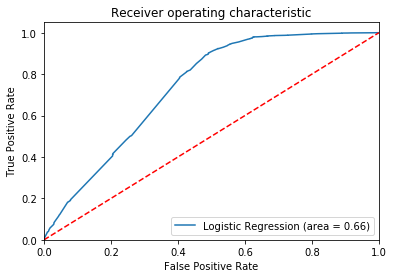

In [553]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Ejercicio Adicional


Sólo para correr un mejor modelo para el Ejercicio 2.4, ahora podemos utilizar el dataframe de income total resultante de este último ejercicio para correr una regresión lineal y ver si con esto obtenemos un mejor modelo.

In [608]:
x= income_total[['Age', 'fnlwgt', 'Education-Num', 'Hours per week',
                'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
                'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '10th',
                '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
                'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
                'Preschool', 'Prof-school', 'Some-college', 'Divorced',
                'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
                'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
                'Craft-repair', 'Exec-managerial', 'Farming-fishing',
                'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
                'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
                'Tech-support', 'Transport-moving', 'Female', 'Male',
                'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
                'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried','Wife','UnitedStates']]
y=income_total['Income']

In [609]:
x=np.array(x,dtype=int)
y=np.array(y,dtype=int)

In [610]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [611]:
X_test= pd.DataFrame(X_test)

In [613]:
# Initialize
linreg5 = LinearRegression(fit_intercept=False)

In [614]:
# Fit
linreg5.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [615]:
linreg5.coef_

array([ 2.37259560e+02, -6.10425629e-04,  2.93530220e+03,  1.42217737e+02,
        6.44631657e+03,  2.02411981e+03,  1.07626277e+04,  2.34298881e+03,
        4.77237413e+03, -4.35654665e+02, -1.15609914e+03, -1.01278027e+04,
       -1.74452010e+03, -4.65940535e+03, -4.95369837e+03,  5.37098681e+03,
        5.41558294e+03,  1.46874236e+03, -2.15180928e+03, -8.89510072e+03,
       -5.92460224e+03, -3.64640604e+03,  1.03657478e+04, -6.56026547e+03,
        2.94509487e+03,  1.06045123e+04,  1.27308075e+04, -6.67492160e+03,
       -1.48205082e+03,  4.13660316e+03,  4.46100722e+03,  1.62952196e+03,
       -2.79275635e+03, -3.44515706e+02, -1.91706396e+03,  1.29642723e+03,
       -9.68458741e+03, -6.30638035e+02,  6.74506788e+03, -4.61781092e+03,
       -2.21101137e+03, -1.70956651e+03,  2.00251732e+02,  3.75387119e+02,
        4.20335186e+03,  2.98336097e+03,  2.81422418e+03,  4.61491843e+03,
       -5.13132348e+02, -6.61088372e+03,  1.03016292e+04, -2.03681172e+02,
        7.86764987e+02,  

In [618]:
y_pred5= linreg5.predict(X_test)

In [619]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 12982.942369010401
MSE: 303729266.851043
RMSE: 17427.830239333955


Como podemos observar, el error se diminuyó considerablemente, pues ahora la diferencia de mínimos cuadrados al cuadrado son USD 17.427. Lo que podríamos continuar haciendo, sin embargo no se realizará en este ejercicio es probar con un modelo de selección de variables para entender cuáles son realmente las que influyen en mayor proporción en el resultado del modelo.